In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pygtc
import emcee
    
import sys 
sys.path.insert(0, '../src/')
import jsm_mcmc

import warnings; warnings.simplefilter('ignore')

### simple model for the data

In [3]:
truths_S = [10.5, 1.9, 0.2, 0, 0, 0] # [10.5, 1.9, 0.2, -0.05, 0.01, 1.2]

plabels = ["$M_{*}$", "$\\alpha$", "$\\sigma$"," $\\gamma$", "$\\beta$", "$\\tau$"]

priors = [[9.5,11.5], [-1,7], [0,5], [-2,2], [-3,2], [-2,2]]

ndim_short = 3

Nstack = 500

In [4]:
ms_10 = jsm_mcmc.single_chain("../../mcmc/model_runs/survey/Nsample/model_10/chain.h5", Nstack, Ndim=ndim_short, truths=truths_S, labels=plabels)

ms_50 = jsm_mcmc.single_chain("../../mcmc/model_runs/survey/Nsample/model_50/chain.h5", Nstack, Ndim=ndim_short, truths=truths_S, labels=plabels)

ms_500 = jsm_mcmc.single_chain("../../mcmc/model_runs/survey/Nsample/model_500/chain.h5", Nstack, Ndim=ndim_short, truths=truths_S, labels=plabels)

ms_1000 = jsm_mcmc.single_chain("../../mcmc/model_runs/survey/Nsample/model_1000/chain.h5", Nstack, Ndim=ndim_short, truths=truths_S, labels=plabels)

ms_100 = jsm_mcmc.single_chain("../../mcmc/model_runs/simple_fid/model_A/chain.h5", Nstack, Ndim=ndim_short, truths=truths_S, labels=plabels)

In [5]:
mlabels = ["Ntree=10", "Ntree=50", "Ntree=100", "Ntree=500", "Ntree=1000"]

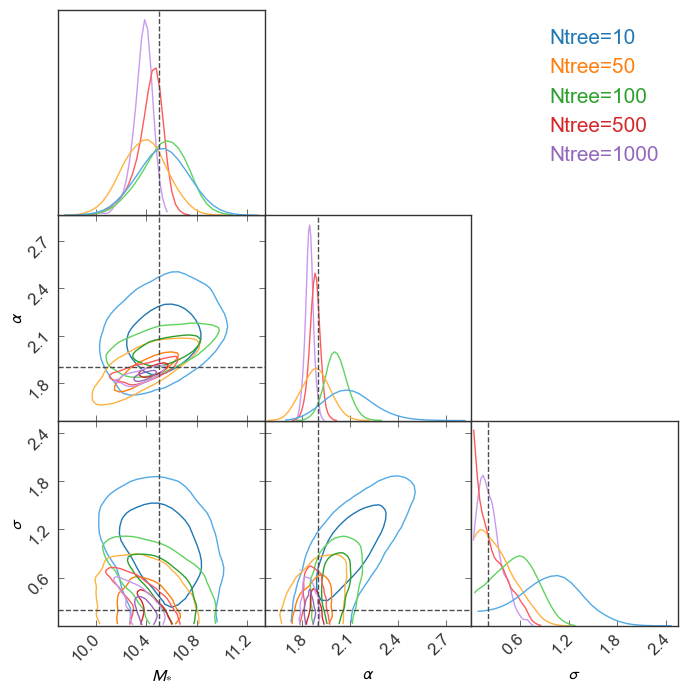

In [6]:
analysis = jsm_mcmc.multi_chain(np.array([ms_10.end, ms_50.end, ms_100.end,  ms_500.end, ms_1000.end]), 3, truths_S, priors, plabels, mlabels, nsigma=2, fill=False)

analysis.trim()

analysis.plot_posteriors()

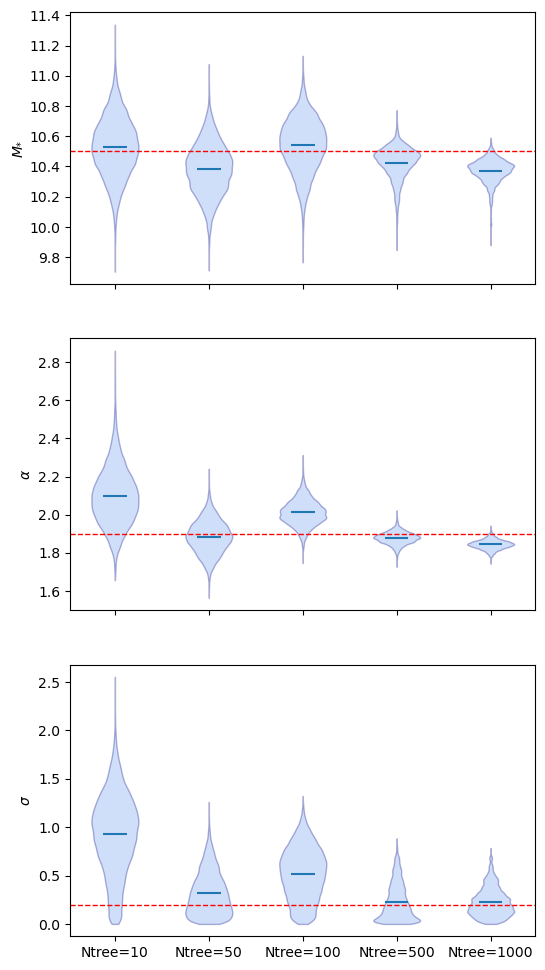

In [7]:
analysis.violin(3)